In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df1 = pd.read_csv('winequality-white.csv', delimiter=';')
df2 = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
df1['type'] = 1
df2['type'] = 0

In [4]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df = df.drop('quality', axis=1)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [6]:
df.type.value_counts(sort=False)

0    1599
1    4898
Name: type, dtype: int64

In [7]:
corr = df.corr()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

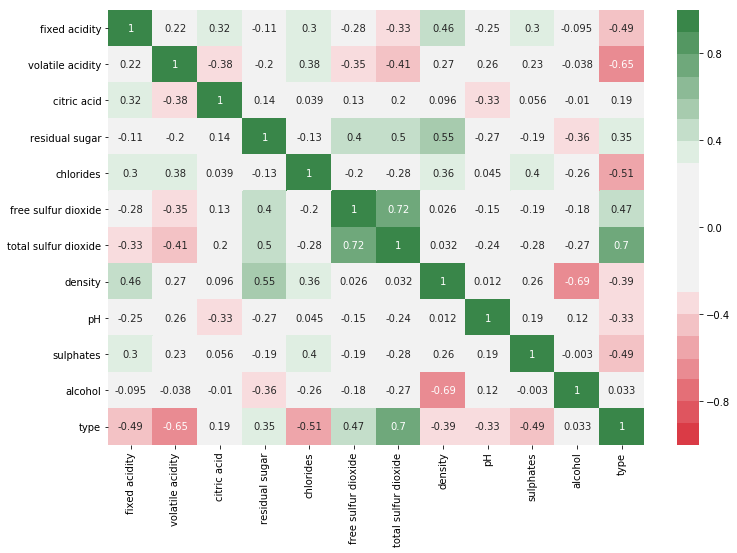

In [9]:
plt.figure(num=None, figsize=(12, 8))
sns.heatmap(corr, center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 133, sep=80, n=20), annot=True)

In [10]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RandomizedLogisticRegression

In [11]:
y = df.type
X = df.iloc[:, :-1]

# # Non-Stratified
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.3, random_state=1294)
# Stratified    
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=.8, random_state=1294)

In [24]:
# fit a logistic regression model to the data
lr1 = LogisticRegression(C=1, class_weight='balanced')
lr1.fit(X_train, y_train)

print(lr1)

# make predictions
lr1_pred = lr1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lr1_pred))
print(metrics.confusion_matrix(y_test, lr1_pred))

LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1279
          1       0.99      0.97      0.98      3919

avg / total       0.97      0.97      0.97      5198

[[1233   46]
 [ 108 3811]]


In [25]:
lr1.coef_

array([[-0.55409478, -5.97522761,  0.09205144,  0.07981941, -1.11457129,
        -0.03149554,  0.06180915,  0.98859958, -2.54677247, -3.80274141,
         0.91901406]])

In [28]:
lr1.intercept_

array([ 1.09941101])

In [13]:
# fit a logistic regression model to the data
# lr2 = LogisticRegression(C=1000)
lr2 = LogisticRegression(solver='newton-cg', 
                         multi_class='multinomial',
                         C=1000)
lr2.fit(X_train, y_train)

print(lr2)

# make predictions
lr2_pred = lr2.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lr2_pred))
print(metrics.confusion_matrix(y_test, lr2_pred))

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1279
          1       0.99      1.00      0.99      3919

avg / total       0.99      0.99      0.99      5198

[[1230   49]
 [  19 3900]]


In [14]:
from collections import Counter
import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [15]:
knn1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=100))
knn1.fit(X_train, y_train)

knn1_pred = knn1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, knn1_pred))
print(metrics.confusion_matrix(y_test, knn1_pred))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96      1279
          1       0.98      0.99      0.99      3919

avg / total       0.98      0.98      0.98      5198

[[1213   66]
 [  24 3895]]


In [16]:
lsvm = make_pipeline(StandardScaler(), LinearSVC())
lsvm.fit(X_train, y_train)

lsvm_pred = lsvm.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lsvm_pred))
print(metrics.confusion_matrix(y_test, lsvm_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1279
          1       1.00      1.00      1.00      3919

avg / total       0.99      0.99      0.99      5198

[[1260   19]
 [   9 3910]]


In [17]:
rbfsvm = make_pipeline(StandardScaler(), SVC(C=1000, kernel='rbf', degree=1))
rbfsvm.fit(X_train, y_train)

svm_rbf_pred = rbfsvm.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, svm_rbf_pred))
print(metrics.confusion_matrix(y_test, svm_rbf_pred))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1279
          1       0.99      1.00      0.99      3919

avg / total       0.99      0.99      0.99      5198

[[1245   34]
 [   7 3912]]


In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
# nb1 = make_pipeline(StandardScaler(), GaussianNB())
nb1 = GaussianNB()
nb1.fit(X_train, y_train)
nb1_pred = nb1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, nb1_pred))
print(metrics.confusion_matrix(y_test, nb1_pred))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1279
          1       0.99      0.98      0.98      3919

avg / total       0.97      0.97      0.97      5198

[[1233   46]
 [  90 3829]]


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
rf1 = RandomForestClassifier(n_estimators=1000, random_state=1294, class_weight='balanced')
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, rf1_pred))
print(metrics.confusion_matrix(y_test, rf1_pred))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1279
          1       0.99      1.00      0.99      3919

avg / total       0.99      0.99      0.99      5198

[[1237   42]
 [   7 3912]]


In [22]:
clf2 = ExtraTreesClassifier(n_estimators=1000, random_state=1294, class_weight='balanced')
clf2.fit(X_train, y_train)
predicted = clf2.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99      1279
          1       0.99      1.00      1.00      3919

avg / total       0.99      0.99      0.99      5198

[[1244   35]
 [   2 3917]]


In [23]:
clf = GradientBoostingClassifier(n_estimators=1000, random_state=1294)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1279
          1       0.99      1.00      0.99      3919

avg / total       0.99      0.99      0.99      5198

[[1236   43]
 [  15 3904]]
